## Predicting Precipitation Type (Classifier)

#### *By: Heaton Chan, Rana Ghadymimahani, Amitaditya Paul, and Renee Choquette*

### Introduction:

One of the aspects that have a great impact on our day-to-day lives, yet that humans have very little control over, is the weather. Accurately predicting future weather has been a constant pursuit for many years, especially with the implications of global warming, which has been causing erratic changes to the climate. We believe that computer analysis is one of the most promising methods to achieve accurate weather predictions. In our project, we will be exploring a weather dataset to answer the following question: given the weather data in the United States, what type of precipitation (rain or snow) will occur. The original dataset contains weather data from different countries in the year 2020, but we chose to focus only on data from the United States (see Exploring Data for reasoning) and the following predictors: dew point, daily high temperature and daily low temperature. 

### Methods:

First, we loaded the packages needed to perform our analysis.

In [14]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyr)
library(gridExtra)
library(rvest)
library(stringr)

#### Read Data:
Then we loaded and read our data from a REMOTE source <-- idk how to do this yo 

In [27]:
url = "https://raw.githubusercontent.com/codingonapotato/dsci100_group_project_S2022/main/data/daily_weather_2020.csv"
download_weather <- download.file(url, destfile = "daily_weather_2020.csv") 
download_weather # Object used to summon the file from the internet to the local machine

weather_data_raw <- suppressWarnings(read_csv("daily_weather_2020.csv")) %>%
                        select(-X1) #Gets rid of the column keeping track of column numbers

[1] 0

Parsed with column specification:
cols(
  .default = col_double(),
  `Country/Region` = col_character(),
  `Province/State` = col_character(),
  time = col_date(format = ""),
  summary = col_character(),
  icon = col_character(),
  precipType = col_character()
)

See spec(...) for full column specifications.



Country/Region Province/State time      
1     Afghanistan    NA             2019-12-31
2     Afghanistan    NA             2020-01-01
3     Afghanistan    NA             2020-01-02
4     Afghanistan    NA             2020-01-03
5     Afghanistan    NA             2020-01-04
6     Afghanistan    NA             2020-01-05
7     Afghanistan    NA             2020-01-06
8     Afghanistan    NA             2020-01-07
9     Afghanistan    NA             2020-01-08
10    Afghanistan    NA             2020-01-09
11    Afghanistan    NA             2020-01-10
12    Afghanistan    NA             2020-01-11
13    Afghanistan    NA             2020-01-12
14    Afghanistan    NA             2020-01-13
15    Afghanistan    NA             2020-01-14
16    Afghanistan    NA             2020-01-15
17    Afghanistan    NA             2020-01-16
18    Afghanistan    NA             2020-01-17
19    Afghanistan    NA             2020-01-18
20    Afghanistan    NA             2020-01-19
21    Afghanistan    NA             2020-01-20
22    Afghanistan    NA             2020-01-21
23    Afghanistan    NA             2020-01-22
24    Afghanistan    NA             2020-01-23
25    Afghanistan    NA             2020-01-24
26    Afghanistan    NA             2020-01-25
27    Afghanistan    NA             2020-01-26
28    Afghanistan    NA             2020-01-27
29    Afghanistan    NA             2020-01-28
30    Afghanistan    NA             2020-01-29
⋮     ⋮              ⋮              ⋮         
30659 Zambia         NA             2020-03-22
30660 Zambia         NA             2020-03-23
30661 Zambia         NA             2020-03-24
30662 Zambia         NA             2020-03-25
30663 Zambia         NA             2020-03-26
30664 Zambia         NA             2020-03-27
30665 Zambia         NA             2020-03-28
30666 Zambia         NA             2020-03-29
30667 Zambia         NA             2020-03-30
30668 Zambia         NA             2020-03-31
30669 Zambia         NA             2020-04-01
30670 Zambia         NA             2020-04-02
30671 Zambia         NA             2020-04-03
30672 Zambia         NA             2020-04-04
30673 Zambia         NA             2020-04-05
30674 Zambia         NA             2020-04-06
30675 Zambia         NA             2020-04-07
30676 Zambia         NA             2020-04-08
30677 Zambia         NA             2020-04-09
30678 Zambia         NA             2020-04-10
30679 Zambia         NA             2020-04-11
30680 Zambia         NA             2020-04-12
30681 Zambia         NA             2020-04-13
30682 Zambia         NA             2020-04-14
30683 Zambia         NA             2020-04-15
30684 Zambia         NA             2020-04-16
30685 Zambia         NA             2020-04-17
30686 Zambia         NA             2020-04-18
30687 Zambia         NA             2020-04-19
30688 Zambia         NA             2020-04-20
      summary                                                                              
1     Rain (with a chance of 1–3 in. of snow) until night, starting again in the afternoon.
2     Light rain throughout the day.                                                       
3     Clear throughout the day.                                                            
4     Partly cloudy throughout the day.                                                    
5     Light rain throughout the day.                                                       
6     Light rain until afternoon.                                                          
7     Clear throughout the day.                                                            
8     Clear throughout the day.                                                            
9     Clear throughout the day.                                                            
10    Clear throughout the day.                                                            
11    Possible light rain (with a chance of 1–2 in. of snow) throughout the day.

#### Exploring Data

We first explored our data by finding all of the columns in the dataframe and then determine how many rows belong to each country. From `count` we discovered that the US had the greatest amount of data in the dataset and will likely allow us to produce a more accurate classifier, thus we decided to filter our data to only contain data from the US.

In [4]:
names <- colnames(weather_data_raw) # So that we can see all the column names in the dataframe

count <- weather_data_raw %>%
            group_by(Country) %>%
            summarize(number_of_rows = n()) %>%
            arrange(desc(number_of_rows)) # So that we can see the rows of data we have to work with in each region         
count

weather_data_US_only <- weather_data_raw %>%
            select(Country, precipProbability, temperatureHigh, temperatureLow, dewPoint, precipType) %>%
            filter(Country == "US") # dataframe that only contains data from US  

`summarise()` ungrouping output (override with `.groups` argument)



Country                number_of_rows
1   US                     6272          
2   China                  3248          
3   Canada                 1120          
4   Australia              1008          
5   France                  896          
6   United Kingdom          560          
7   Netherlands             336          
8   Denmark                 224          
9   Afghanistan             112          
10  Albania                 112          
11  Algeria                 112          
12  Andorra                 112          
13  Antigua and Barbuda     112          
14  Argentina               112          
15  Armenia                 112          
16  Aruba                   112          
17  Austria                 112          
18  Azerbaijan              112          
19  Bahrain                 112          
20  Bangladesh              112          
21  Barbados                112          
22  Belarus                 112          
23  Belgium                 112          
24  Benin                   112          
25  Bhutan                  112          
26  Bolivia                 112          
27  Bosnia and Herzegovina  112          
28  Brazil                  112          
29  Brunei                  112          
30  Bulgaria                112          
⋮   ⋮                      ⋮             
131 Senegal                112           
132 Serbia                 112           
133 Seychelles             112           
134 Singapore              112           
135 Slovakia               112           
136 Slovenia               112           
137 Somalia                112           
138 South Africa           112           
139 Spain                  112           
140 Sri Lanka              112           
141 Sudan                  112           
142 Suriname               112           
143 Sweden                 112           
144 Switzerland            112           
145 Taiwan*                112           
146 Tanzania               112           
147 Thailand               112           
148 The Bahamas            112           
149 The Gambia             112           
150 Togo                   112           
151 Trinidad and Tobago    112           
152 Tunisia                112           
153 Turkey                 112           
154 Ukraine                112           
155 United Arab Emirates   112           
156 Uruguay                112           
157 Uzbekistan             112           
158 Venezuela              112           
159 Vietnam                112           
160 Zambia                 112

#### Dropping `NA`'s and Final Tidy Data

We then wanted to explore how many of the rows in our data are blank (listed as `NA`) and filter these rows out to produce our final "clean" dataset (`weather_data`). We also included a table which summarizes the number of rows with all US data (including those with `NA`'s), how many of those rows contained missing values, and how many rows remain in the final tidy dataset.

In [5]:
na_count <- weather_data_US_only %>%
            is.na() %>%
            as.data.frame() %>%
            filter(precipType == TRUE) %>%
            group_by(precipType) %>%
            summarize(number_of_missing = n()) %>%
            select(-precipType) #formally showing number of missing values in a weather_data_US_only dataframe

weather_data <- weather_data_US_only %>% 
    drop_na() %>%
    mutate(precipType = as.factor(precipType)) #dropping all NA values from the dataset and mutating precipType into a factor

unified_tibble <- slice(count, 1) %>%
                    bind_cols(na_count) %>%
                    mutate(number_of_rows_final = nrow(weather_data))
unified_tibble #Aggregate table for column number and number of *previously missing values in the dataset that got removed

`summarise()` ungrouping output (override with `.groups` argument)



Country number_of_rows number_of_missing number_of_rows_final
1 US      6272           26                6246

#### Splitting Data 

We then split our original dataset into a training set (50% of original data) and a testing set (other 50% of original data).

In [45]:
set.seed(2022)

weather_split <- weather_data %>%
                initial_split(prop = 0.6, strata = precipType)
weather_training <- training(weather_split) #training dataset
weather_testing <- testing(weather_split) #testing dataset

#### Choosing and Visualizing Predictors

We then explored our data by calculating the mean dew point, probability of precipitation, daily high temperature, and daily low temperature.  In addition, we plotted our 3 predictors vs. probability of precipitation to visualize our data. From these visualizations, which all show a clear split between snow and rain precipitation types, we concluded that `dewPoint`, `temperatureHigh`, and `temperatureLow` have an effect on precipitation type. To confirm our choice of predictors, we also conducted some research which concluded that 

`summarise()` ungrouping output (override with `.groups` argument)



Country number_of_rows mean_precipProbability mean_temperatureHigh
1 US      3749           0.3376154              53.43083            
  mean_temperatureLow mean_dewPoint
1 37.31318            34.33473

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]

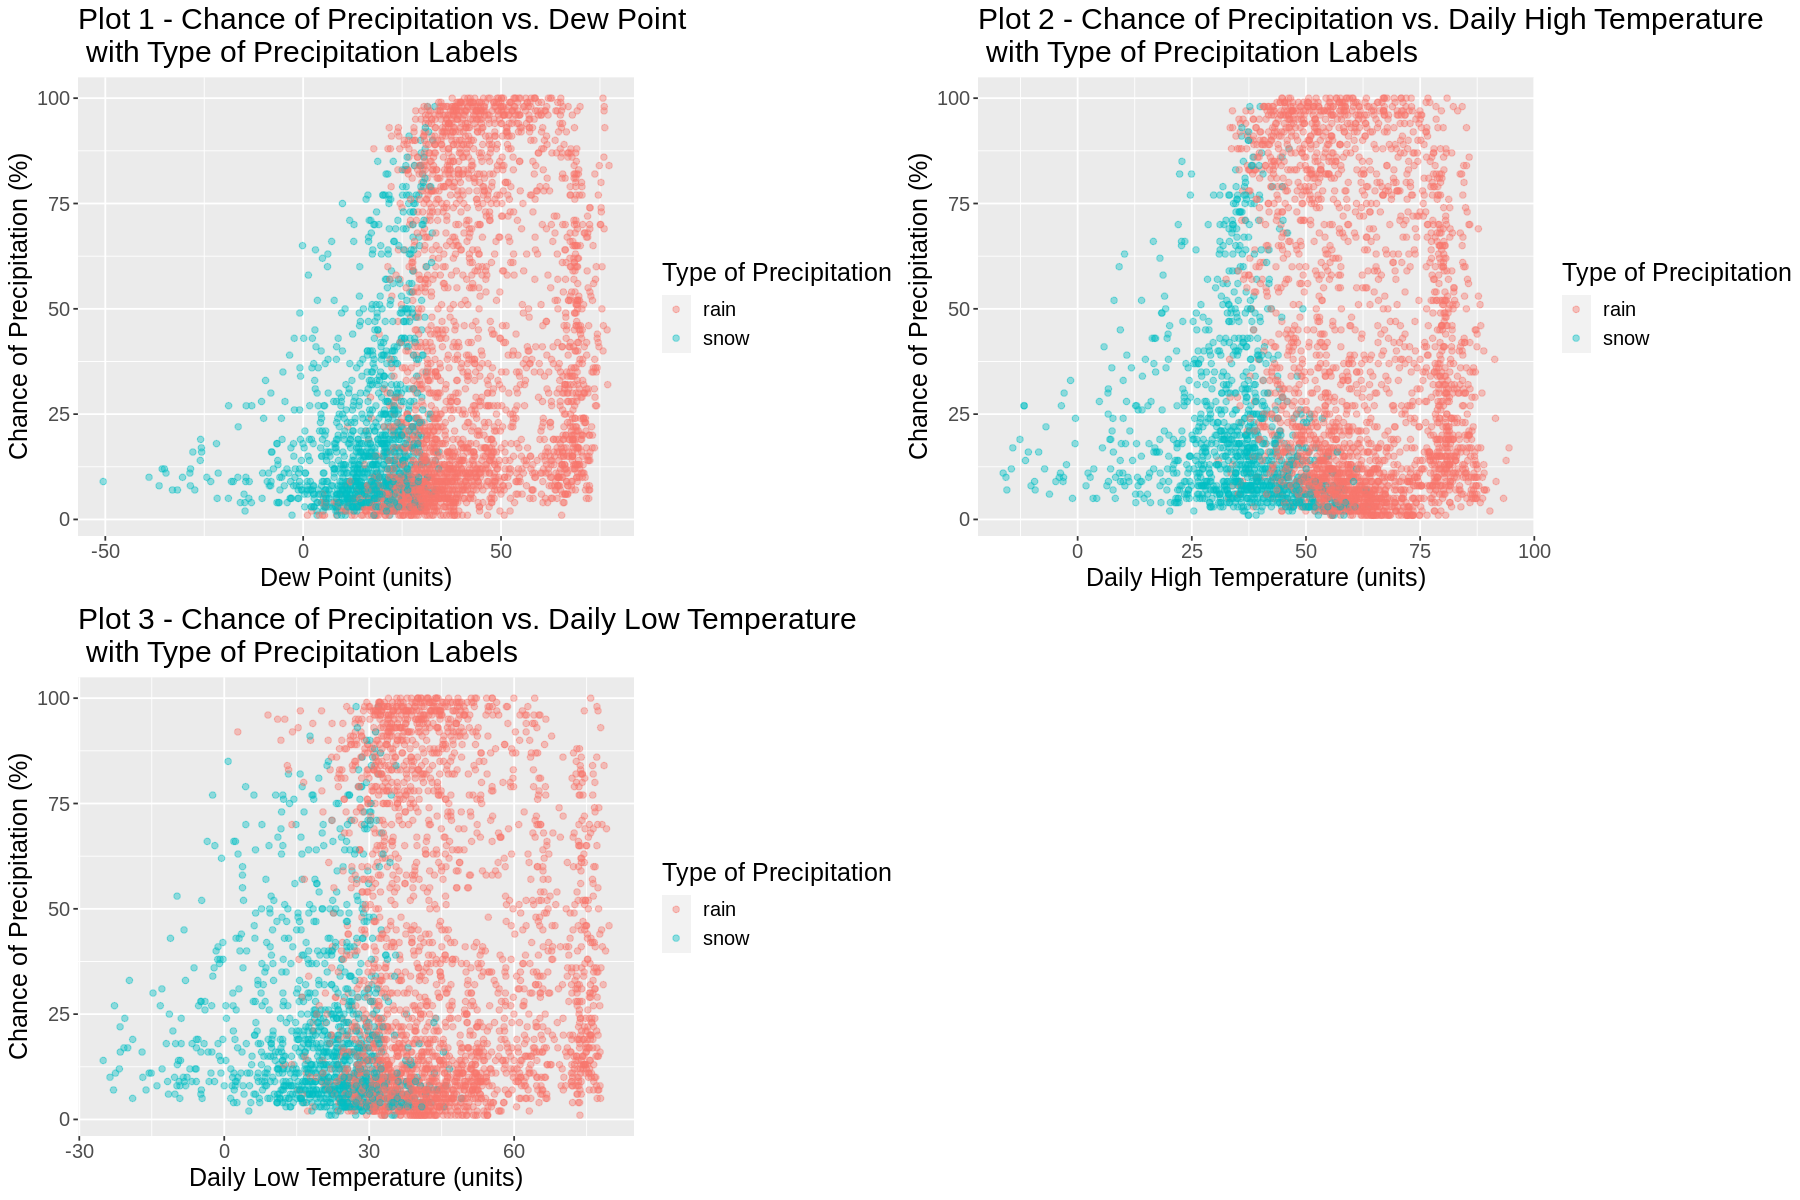

In [46]:
weather_train_means <- weather_training %>%
                            select(-Country, -precipType) %>%
                            map_df(mean) %>%
                            rename(mean_dewPoint = dewPoint,
                                  mean_precipProbability = precipProbability,
                                  mean_temperatureHigh = temperatureHigh,
                                  mean_temperatureLow = temperatureLow) #computed means for across all columns

weather_train_total <- weather_training %>%
                            group_by(Country) %>%
                            summarize(number_of_rows = n()) #computed total number of rows

weather_train_aggregate <- weather_train_total %>%
                                bind_cols(weather_train_means) #aggregated summary tables for the training data 
weather_train_aggregate

options(repr.plot.width = 15, repr.plot.height = 10)
plot1 <- weather_training %>%
                        mutate(precipProbability = precipProbability*100) %>%
                        ggplot(aes(x = dewPoint, y = precipProbability)) +
                        geom_point(aes(colour = precipType), alpha = 0.4) +
                        labs(x = "Dew Point (units)", y = "Chance of Precipitation (%)", colour = "Type of Precipitation") +
                        theme(text = element_text(size = 15)) +
                        ggtitle("Plot 1 - Chance of Precipitation vs. Dew Point \n with Type of Precipitation Labels")

plot2 <- weather_training %>%
                        mutate(precipProbability = precipProbability*100) %>%
                        ggplot(aes(x = temperatureHigh, y = precipProbability)) +
                        geom_point(aes(colour = precipType), alpha = 0.4) +
                        labs(x = "Daily High Temperature (units)", y = "Chance of Precipitation (%)", colour = "Type of Precipitation") +
                        theme(text = element_text(size = 15)) +
                        ggtitle("Plot 2 - Chance of Precipitation vs. Daily High Temperature \n with Type of Precipitation Labels")
plot3 <- weather_training %>%
                        mutate(precipProbability = precipProbability*100) %>%
                        ggplot(aes(x = temperatureLow, y = precipProbability)) +
                        geom_point(aes(colour = precipType), alpha = 0.4) +
                        labs(x = "Daily Low Temperature (units)", y = "Chance of Precipitation (%)", colour = "Type of Precipitation") +
                        theme(text = element_text(size = 15)) +
                        ggtitle("Plot 3 - Chance of Precipitation vs. Daily Low Temperature \n with Type of Precipitation Labels")

plots_together <- grid.arrange(plot1, plot2, plot3, ncol = 2)
plots_together

#### Finding the Best K-value

`best_k_value` = 40

[1] 40

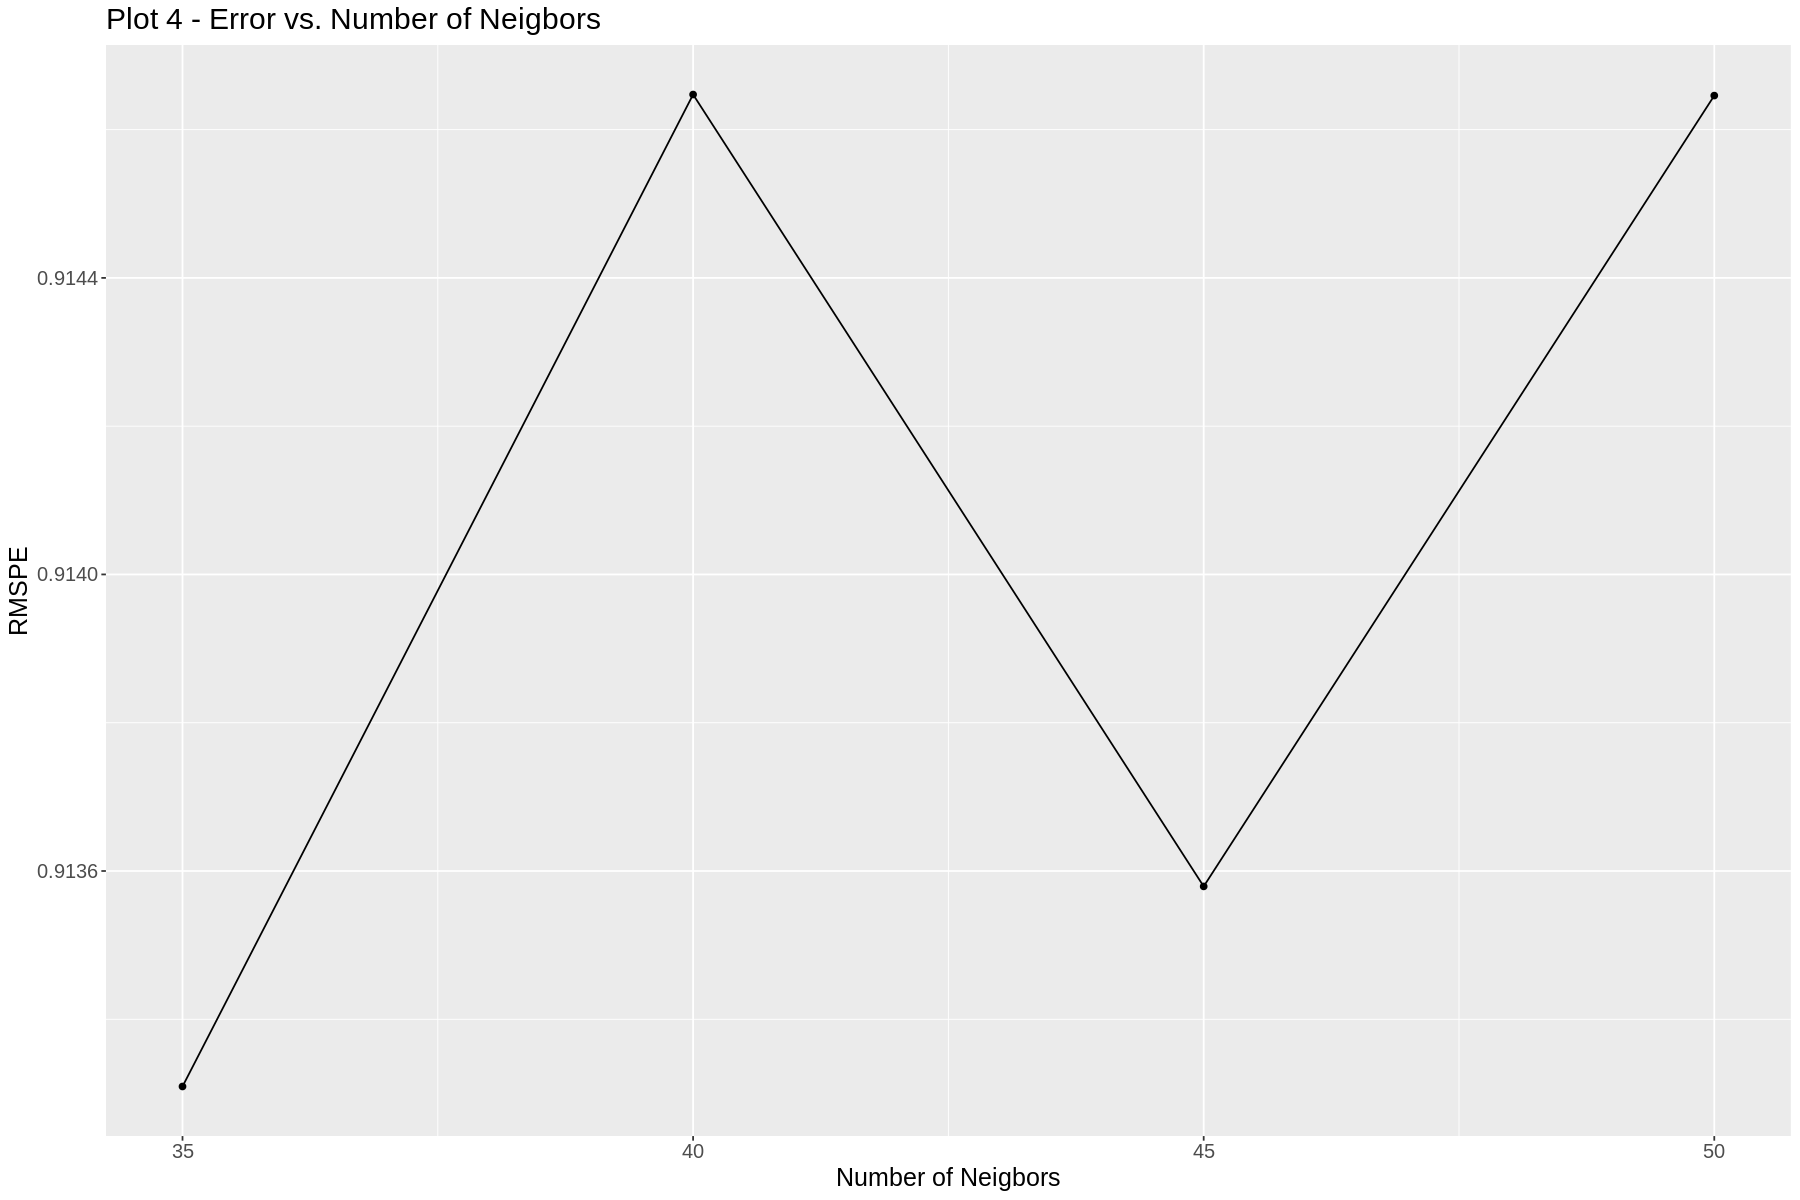

In [47]:
#---------------> DONT RUN THIS CELL CAUSE IT TAKES ALMOST A MINUTE TO RUN <--------------------
set.seed(2022)
weather_recipe <- recipe(precipType ~ dewPoint + temperatureLow + temperatureHigh, data = weather_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification')

weather_vfold <- vfold_cv(weather_training, v = 5, strata = precipType) 
k_vals1 <- tibble(neighbors = seq(from = 35, to = 50, by = 5))

number_of_neighbors_stats <- workflow() %>%
    add_recipe(weather_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = weather_vfold, grid = k_vals1) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

options(repr.plot.width = 15, repr.plot.height = 10)
number_of_neighbors_plot <- ggplot(number_of_neighbors_stats, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neigbors", y = "RMSPE",
        title = "Plot 4 - Error vs. Number of Neigbors") +
    theme(text = element_text(size = 15))

number_of_neighbors_plot

best_k_value <- number_of_neighbors_stats %>%
    arrange(by = desc(mean)) %>%
    slice(1) %>%
    select(neighbors) %>%
    pull()
best_k_value

#### Coding the Classifier & RMSE Calculation

$RMSE = 0.919$

In [48]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) %>%
    set_engine('kknn') %>%
    set_mode('classification')

knn_fit <- workflow() %>%
    add_recipe(weather_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = weather_training)

weather_rmse <- predict(knn_fit, weather_training) %>%
    bind_cols(weather_training) %>%
    metrics(truth = precipType, estimate = .pred_class) %>%
    filter(.metric == "accuracy") %>%
    select(.estimate) %>%
    pull()
weather_rmse

[1] 0.9191784

### Methods (COPIED FROM PROPOSAL):

Our goal is to predict what type of precipitation (rain or snow) will occur based on the following variables; dew point, daily high temperature, daily low temperature, humidity, pressure, and probability of precipitation, with a focus on the US region. We chose the above variables because our exploratory data analysis plots showed a clear split between snow and rain precipitation types when plotted, thus we believe that they all have an effect on the type of precipitation. We will do this by splitting our original dataset into a training set (75% of original data) and a testing set (25% of original). We will then use the training data set to train our classifier to predict the type of precipitation using a K-nearest neighbor model. Prior to building our model, we will perform a cross-fold analysis to obtain a K-value with the highest accuracy. Next, we will run our classifier on our testing set and measure how accurately it performed. Finally, we will use those results to graph the proportion of data points our classifier predicted correctly and incorrectly. We will use a bar plot to produce such a visualization, as bar plots are preferred when visualizing proportions in data. We may also graph scatter plots of our different predictors to visualize trends in our data. Furthermore, we have provided an example of a precipitation probability vs. dew point graph above, but this data set provides many variables that we can measure and explore, to increase the accuracy of our prediction. 

### Expected outcomes and significance (COPIED FROM PROPOSAL):

We expect to find the precipitation type in the US, based on past data on humidity levels, daily low and high temperatures, pressure, dew points, and probability of precipitation. We chose the US as our focal country because it has the greatest amount of data in the dataset and will likely allow us to produce a more accurate classifier. The goal of predicting the type of precipitation is to provide information that people and organizations can use to reduce weather-related losses and enhance societal benefits. This includes protecting life and property, public health and safety, and support of economic prosperity and quality of life, as well as alerting businesses that rely on the weather (like farming or fishing), warning drivers to be cautious on the roads with certain weather conditions, to notify people how they should dress to stay safe and warm. Another question our findings may lead to is, when will each type of precipitation occur and in what amounts.
